In [2]:
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

scaler = MinMaxScaler()
x_data = pd.read_csv("newSourceOverall.csv").drop(columns=["short_name", "player_positions"])
# x_data = scaler.fit_transform(x_data)
y_data = pd.read_csv("newTargetOverall.csv")
y_data = y_data.to_numpy() / 1000000

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

{'metric': 'manhattan', 'n_neighbors': 47}


<AxesSubplot:>

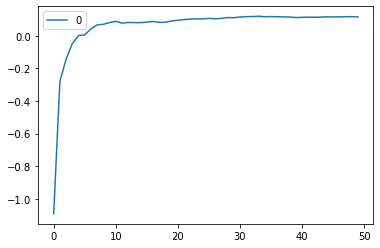

In [5]:
params = {'n_neighbors': [*range(1, 50, 2)], "metric": ["manhattan", "minkowski"]}

knn = KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(x_train, y_train)
print(model.best_params_)

rmse_val = []  #to store rmse values for different k
for K in range(1, 100, 2):
    model = KNeighborsRegressor(n_neighbors=K)

    model.fit(x_train, y_train)  #fit the model
    predictions = model.predict(x_test)  #make prediction on test set
    error = r2_score(y_test, predictions)
    rmse_val.append(error)  #store rmse values

#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val)  #elbow curve
curve.plot()

In [6]:
model = KNeighborsRegressor(n_neighbors=47, metric="manhattan")
model.fit(x_train, y_train)  #fit the model
predictions = model.predict(x_test)  #make prediction on test set
error = mean_squared_error(y_test, predictions)
print("mse", mean_squared_error(y_test, predictions))
print("mae", mean_absolute_error(y_test, predictions))
print("RMSE", mean_squared_error(y_test, predictions, squared=False))
print("MAPE", mean_absolute_percentage_error(y_test, predictions))
print("R2", r2_score(y_test, predictions))

mse 3.5379376037422644e-12
mae 1.4552304964539001e-06
RMSE 1.8809406167506364e-06
MAPE 687417789.8462331
R2 0.10452991256699484


In [7]:
params = {'max_depth': [*range(5, 50, 5)], "n_estimators": [50, 100,200,250,300]}

forest = RandomForestRegressor()
model = GridSearchCV(forest, params, cv=5)
model.fit(x_train, y_train.ravel())
print(model.best_params_)

{'max_depth': 40, 'n_estimators': 200}


In [4]:
feature_names = x_data.columns.values
forest = RandomForestRegressor(max_depth=40, random_state=42, n_estimators=200)

forest.fit(x_train, y_train)
predictions = forest.predict(x_test)
print("mse", mean_squared_error(y_test, predictions))
print("mae", mean_absolute_error(y_test, predictions))
print("RMSE", mean_squared_error(y_test, predictions, squared=False))
print("MAPE", mean_absolute_percentage_error(y_test, predictions))
print("R2", r2_score(y_test, predictions))

# Get numerical feature importances
importances = list(forest.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_names, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];



C:\Users\omerk\OneDrive - Y-Con B.V\Google\Thesis\data\archive\venv\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mse 3.011150260416665e-12
mae 1.3213854166666664e-06
RMSE 1.73526662516648e-06
MAPE 608314338.0491745
R2 0.23786248120455633
Variable: potential            Importance: 0.14
Variable: age                  Importance: 0.06
Variable: id                   Importance: 0.04
Variable: club_name            Importance: 0.03
Variable: league_name          Importance: 0.03
Variable: value_eur            Importance: 0.03
Variable: power_stamina        Importance: 0.03
Variable: height_cm            Importance: 0.02
Variable: weight_kg            Importance: 0.02
Variable: nationality          Importance: 0.02
Variable: overall              Importance: 0.02
Variable: wage_eur             Importance: 0.02
Variable: international_reputation Importance: 0.02
Variable: team_position        Importance: 0.02
Variable: attacking_crossing   Importance: 0.02
Variable: attacking_heading_accuracy Importance: 0.02
Variable: attacking_volleys    Importance: 0.02
Variable: skill_curve          Importance: 0.02
V

In [3]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(x_train, y_train)
predictions = linreg.predict(x_test)
print("mse",mean_squared_error(y_test,predictions))
print("mae",mean_absolute_error(y_test,predictions))
print("RMSE", mean_squared_error(y_test, predictions, squared=False))
print("MAPE", mean_absolute_percentage_error(y_test, predictions))
print("R2", r2_score(y_test, predictions))

mse 2.9735382169699863e-12
mae 1.3401084153675064e-06
RMSE 1.7243950292696818e-06
MAPE 611499764.482846
R2 0.24738228160977138
